In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Desktop/data1.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [4]:
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [5]:
# Checking the total missing values in each column.
print("Total NULL Values in each columns :")
print("---------------------------------")

df.isna().sum()

Total NULL Values in each columns :
---------------------------------


Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [6]:
df.describe(include='all').round(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000,116.000,116.000,116.000,116.000,116.000,116.000,116.000,116.000,116.000
mean,57.302,27.582,97.793,10.012,2.695,26.615,10.181,14.726,534.647,1.552
std,16.113,5.020,22.525,10.068,3.642,19.183,6.843,12.391,345.913,0.499
min,24.000,18.370,60.000,2.432,0.467,4.311,1.656,3.210,45.843,1.000
25%,45.000,22.973,85.750,4.359,0.918,12.314,5.474,6.882,269.978,1.000
50%,56.000,27.662,92.000,5.924,1.381,20.271,8.353,10.828,471.322,2.000
75%,71.000,31.241,102.000,11.189,2.858,37.378,11.816,17.755,700.085,2.000
max,89.000,38.579,201.000,58.460,25.050,90.280,38.040,82.100,1698.440,2.000


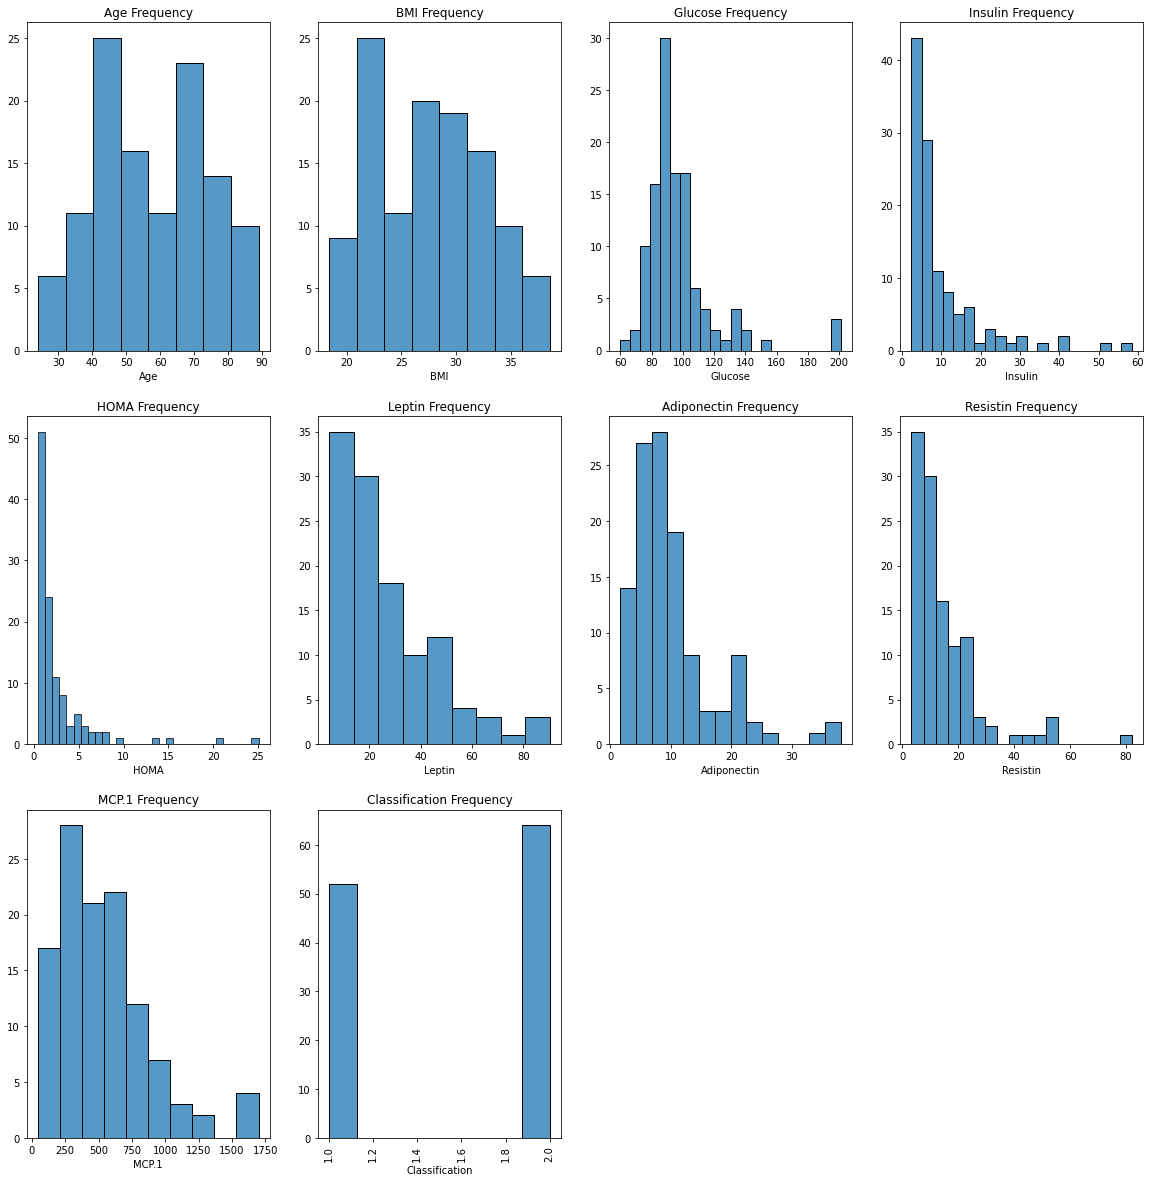

In [7]:
import seaborn as sns
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.histplot(x=col,data=df)
    plt.title(str(col)+' Frequency')
    plt.ylabel('')

plt.xticks(rotation='vertical')
plt.show()

In [8]:
X = df.drop(['Classification'],axis = 1)
y = df['Classification']

In [9]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=4) # 70% training and 30% test

In [11]:
X_train.shape, X_test.shape

((81, 9), (35, 9))

## Scaling of Features

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-0.48529329,  1.83469575,  0.06600908,  0.01995571, -0.0588295 ,
        -0.01515591,  1.89455965, -0.42011025,  0.43191121],
       [ 0.53240915, -1.25248402,  0.52911218, -0.3231549 , -0.23384197,
         0.252053  , -0.88728051, -0.03058428,  0.48089144],
       [-0.6125061 , -0.97381053,  0.15020965, -0.71057904, -0.5261423 ,
        -0.96435938,  0.02501991, -0.32753632, -0.5107782 ],
       [ 1.61371798, -1.333875  , -0.31289345, -0.63108979, -0.49837892,
        -1.02957323, -0.76803597, -0.3976617 ,  0.65087538],
       [ 0.65962195, -0.44486497,  0.52911218,  0.04157207,  0.02678072,
        -0.41720482, -0.65130423,  1.90755696,  0.72364681]])

## Analysing target variable :

In [13]:
df["Classification"].describe()

count    116.000000
mean       1.551724
std        0.499475
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Classification, dtype: float64

In [14]:
df["Classification"].unique()

array([1, 2])

We can clearly, see that this is a classification problem, with the target variable having values (1 and 2)

In [15]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


## Modeling (SVM with Scikit-learn)

In [16]:

from sklearn import svm


clf = svm.SVC(kernel='linear', gamma='auto', C=2) # Linear Kernel


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics  import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       0.88      0.78      0.82        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



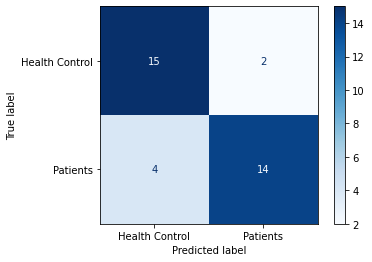

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap = "Blues",display_labels = ['Health Control','Patients'])
plt.show()

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

# Data Set 2

In [86]:
df2=pd.read_csv("Desktop/heart_failure_clinical_records_dataset (3).csv")
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [88]:
df2.describe(include='all').round(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,0.431,581.839,0.418,38.084,0.351,263358.029,1.394,136.625,0.649,0.321,130.261,0.321
std,11.895,0.496,970.288,0.494,11.835,0.478,97804.237,1.035,4.412,0.478,0.468,77.614,0.468
min,40.000,0.000,23.000,0.000,14.000,0.000,25100.000,0.500,113.000,0.000,0.000,4.000,0.000
25%,51.000,0.000,116.500,0.000,30.000,0.000,212500.000,0.900,134.000,0.000,0.000,73.000,0.000
50%,60.000,0.000,250.000,0.000,38.000,0.000,262000.000,1.100,137.000,1.000,0.000,115.000,0.000
75%,70.000,1.000,582.000,1.000,45.000,1.000,303500.000,1.400,140.000,1.000,1.000,203.000,1.000
max,95.000,1.000,7861.000,1.000,80.000,1.000,850000.000,9.400,148.000,1.000,1.000,285.000,1.000


In [89]:
X = df2.drop(['DEATH_EVENT'],axis = 1)
y = df2['DEATH_EVENT']

In [90]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Algorithm

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

DTC = DecisionTreeClassifier(criterion='entropy', random_state=0)

DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
y_pred = DTC.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  9]
 [ 6 12]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.57      0.67      0.62        18

    accuracy                           0.75        60
   macro avg       0.71      0.73      0.72        60
weighted avg       0.76      0.75      0.75        60



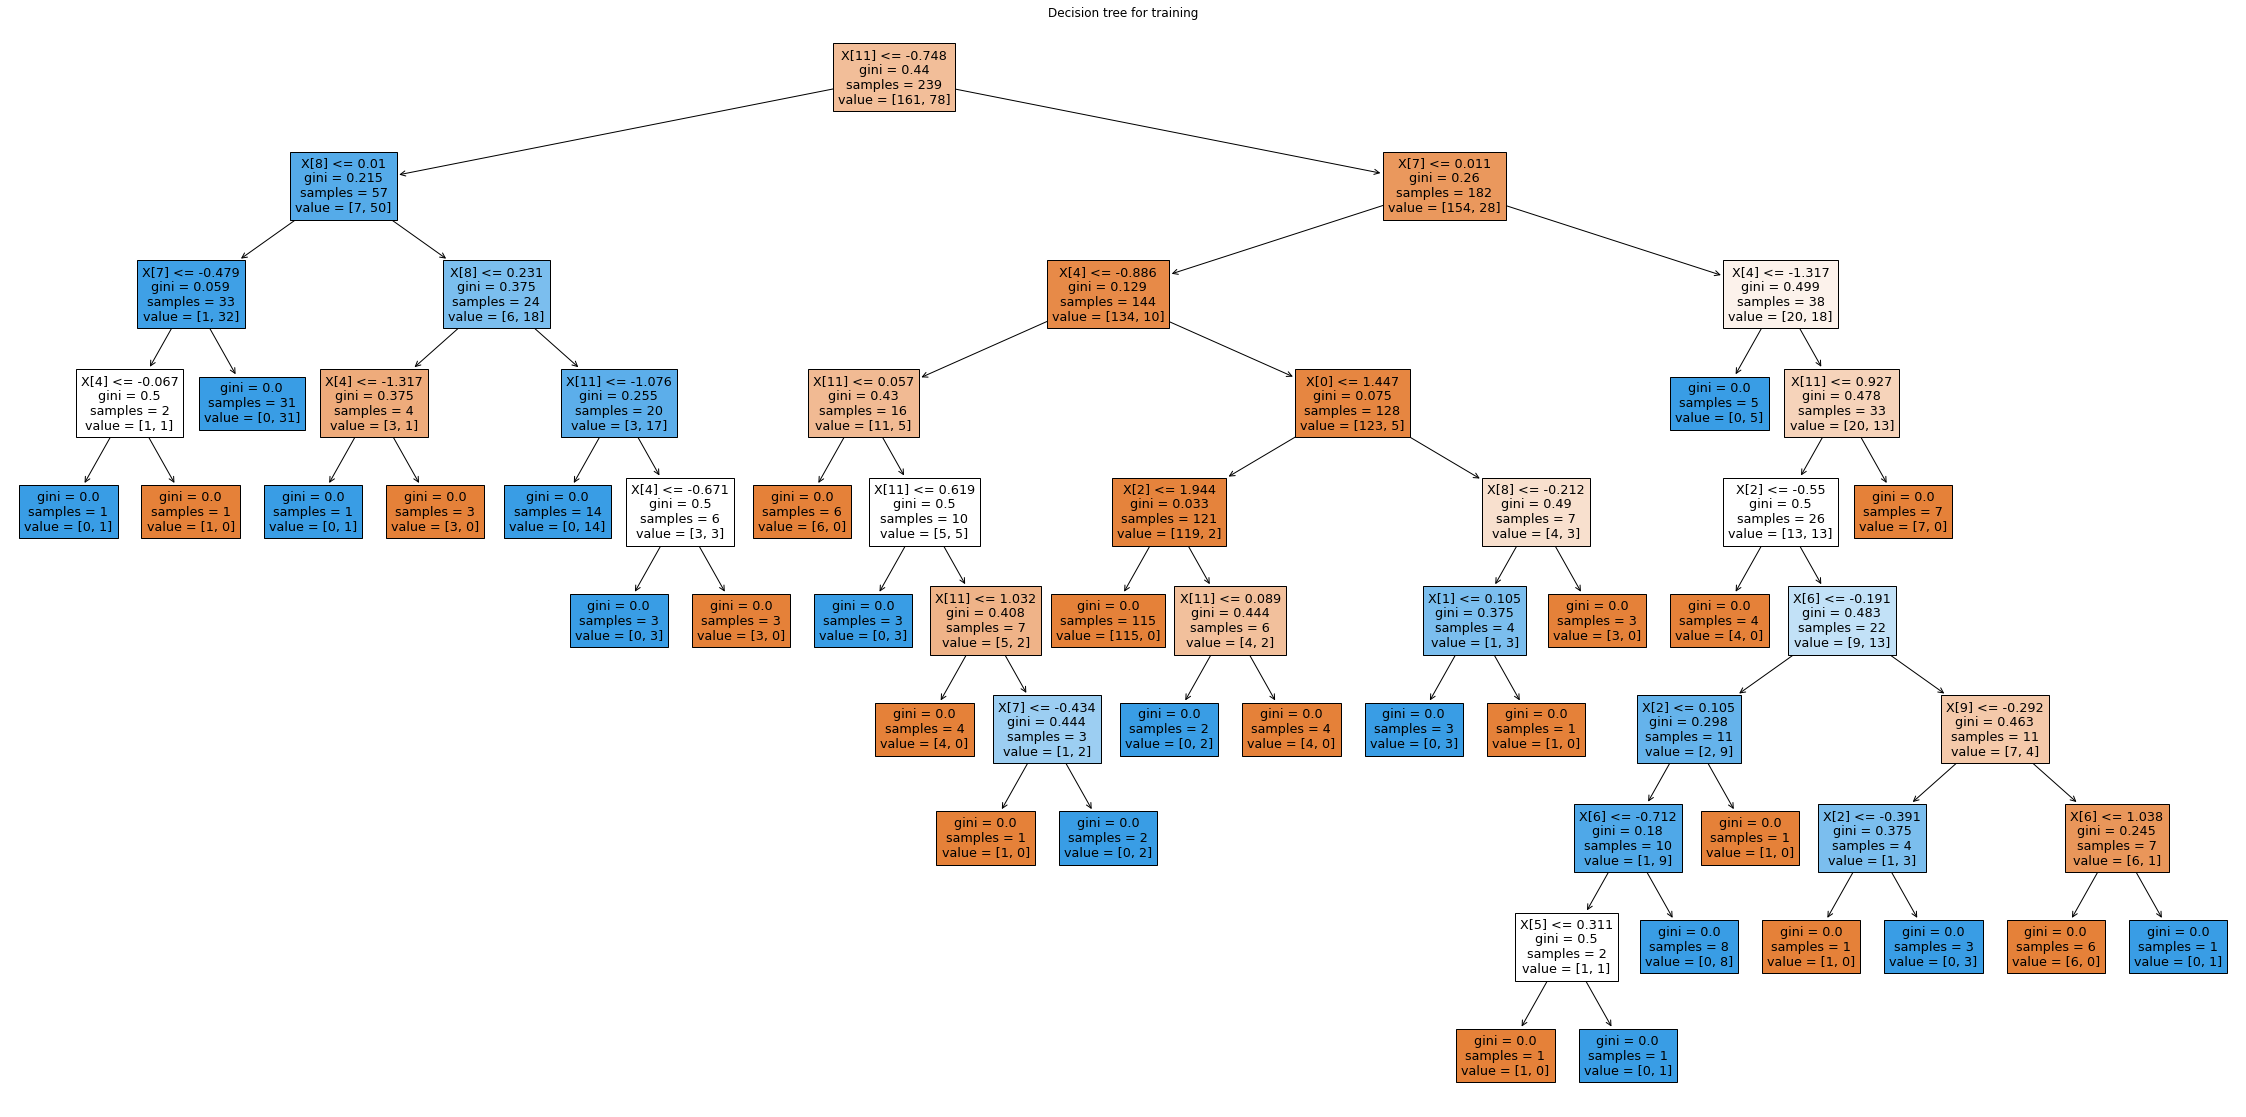

In [95]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
DTC = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
DTC = DTC.fit(X_train, y_train)
plot_tree(DTC, filled=True)
plt.title("Decision tree for training")
plt.show()

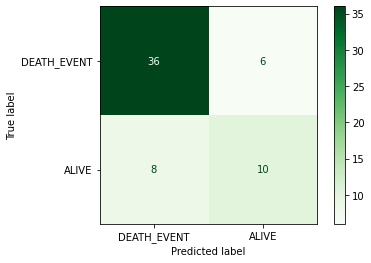

In [96]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTC,X_test,y_test,cmap = "Greens",display_labels = ['DEATH_EVENT','ALIVE'])
plt.show()